##  Business Problem: 

To predict the prices of houses in Californa (1990) based on their different specifications and locations

##   Description : 

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The information was collected on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances were computed among the centroids of each block group as measured in latitude and longitude and all the districts reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). The other variables are as follows: 

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
#importing Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data
data_path = 'C:/Users/kusht/OneDrive/Desktop/Excel-csv/housing.csv'
housing = pd.read_csv(data_path)


**TASK : Get info about the dataset using `info()`**

In [3]:
### START CODE HERE (~ 1 Line of code)

### END CODE

**TASK : Fill the information we get from `info()`**
- total observations: `_`  (Each observation is the data about a block group)
- total columns (features): `_`
- data type of each feature: `_` numberical and `_` object 
- features with null values : `____` 

**TASK : Output the first five instances of the dataset and analyse**

In [5]:
### START CODE HERE (~1 Line of code)

### END CODE

## Data Description: 
`describe()` shows a summary of <b>numerial features</b> , which can be visualized using boxplots and histograms. `value_counts()` can be used to generate a summary of <b>categorical features</b>.

**TASK : Describe the dataset**

In [6]:
### START CODE HERE (~ 1 Line of code)

### END CODE

## EDA

### Univariate

**TASK : Make a `Boxplot` of `median_house_value`**

In [7]:
### Create BOXPLOT using boxplot() and keep figsize=(6,6)

### START CODE HERE : (~ 1 Line of code)

### END CODE HERE

**TASK : Now make `histograms` of all of the Numerical Attributes**

In [8]:
# Create histograms of all attributes in one line using hist() function and keep figsize=(15,15)

### START CODE HERE : (~1 Line of code)

### END CODE


Given that `.boxplot()` and `.hist()` only handle numerical features. You have to use other technique to visualise categorical attributes like `ocean_proximity`, which is object type 

One idea is to plot a bar graph between elements names/labels and their respective counts/frequencies . The frequencies can be found out using `value_counts()` method and a barplot can be plotted between indexes and values of the categorical attributes value_counts

**Task : Find value counts of the categorical attribute and store it in a variable `op_count`**

In [9]:
### START CODE HERE (~ 1 Line of code)

### END CODE

**TASK : Plot a `bar graph` between op_count indexes and op_count values**

In [10]:
### Parameters: figsize=(10,5) , alpha= 0.7 , fontsize=12 for x and y labels

### START CODE HERE (FULL CODE)

### END CODE

## Understand and Analyse The Data
1. Make sense of the data

      - **Why are total rooms and bedrooms in hunderds or thousands?** 
      - **Is population in thousands or millions or just the number of people living in that block?** 
      - **Why does median income value is so low? is it already scaled?** 
 

2. Feature Scaling : Is it required? 
 
3. Distribution: from the histograms what can you infer , is the data skewed or normal? 

We limit the number of categories by dividing the median income by 1.5 and merge all the income greater than 5 into 5. Then, we can use stratified sampling.

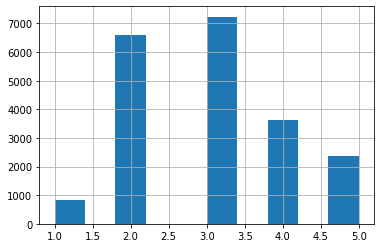

In [17]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)
housing['income_cat'].hist()

In [18]:
# stratified sampling based on income categories
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [26]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,120600.0,INLAND,3.0
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,72300.0,INLAND,1.0
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN,5.0
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,98900.0,INLAND,3.0
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND,3.0


stratified sampling's distributions are much more similar to the overall distributions compared with random sampling

In [27]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [29]:
# we need to do the random sampling again to include income_cat column
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set['income_cat'].value_counts() / len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [30]:
# drop the income_cat attributes
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [31]:
# check the dropping result
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4079 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


Now keeping aside the test set and only use the training set

In [205]:
housing = strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


### Additional Visualizations for Data Exploration
The following geographical data visualizations show that the price is related to the location and population density.

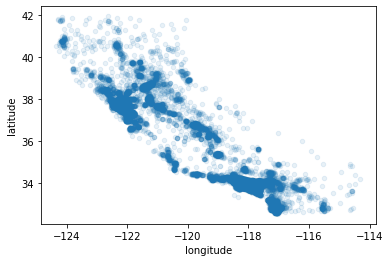

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

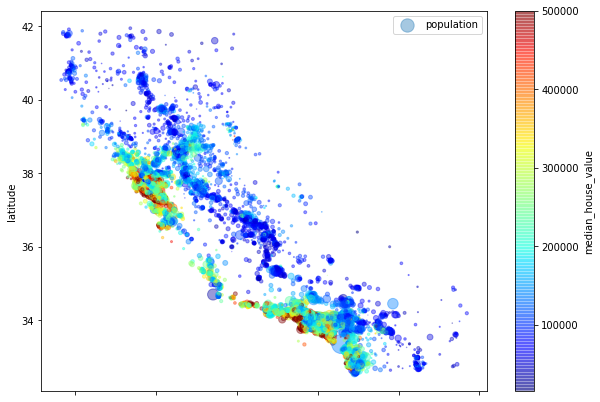

### Correlation Analysis
We want to further explore the data to look for correlations between different attributes. correlation coefficient is between -1 and 1, representing negative and positive correlations. 0 means there is no liner correlation. Correlation is said to be linear if the **ratio of change** is constant, otherwise is non-linear. 

In [35]:
# Making correlation matrix
corr_matrix = housing.corr()
# Check the how much each attribute correlates with the median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<b> Plotting a scatter matrix gives a good idea about histograms of each attribute and their dependencies on each other through scatter plots between each pair </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B67D7E0948>,
      dtype=object)

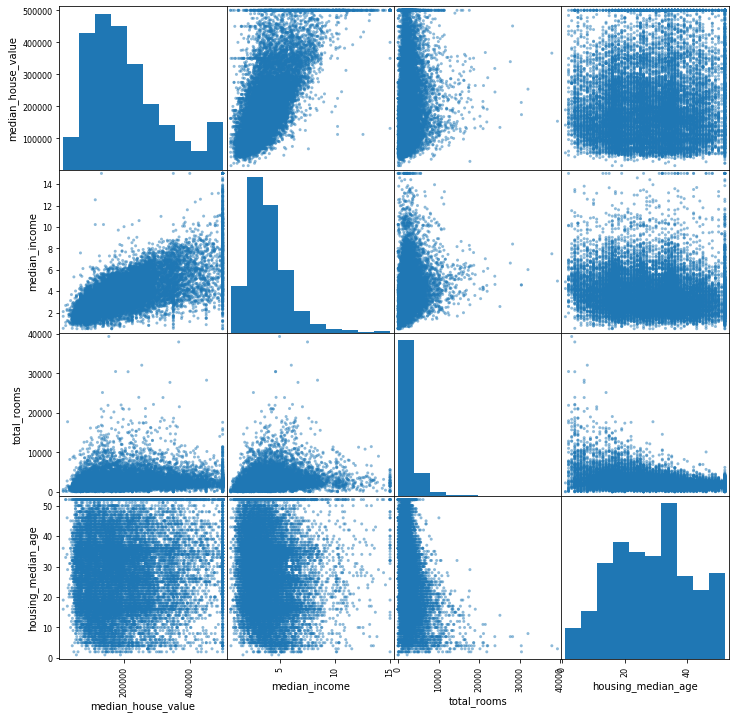

In [37]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,12))

We can see that median_income is a promising attribute to predict median_house_value. A close-up of the scatterplot is as follows:

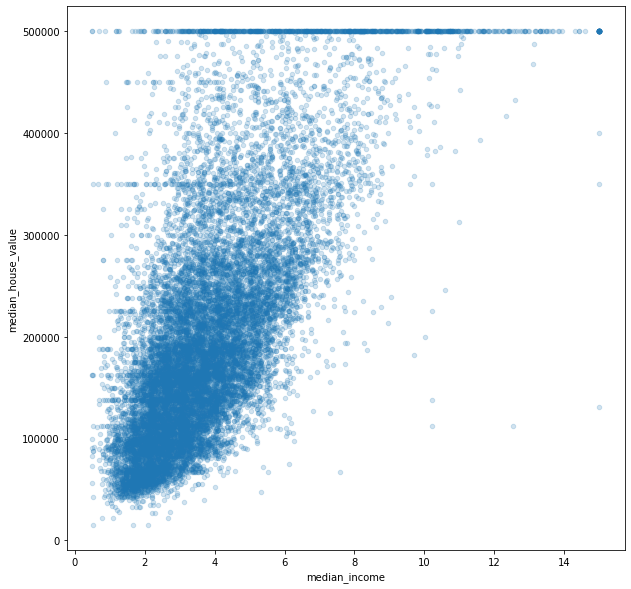

In [38]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

As it can be seen from the above scatterplot that there are many horizontal lines or many duplicate values of median_housing_value , thus we'll remove all rows having more than 20 duplicates to get a more uniform scatter plot and thus correlation

In [206]:
#finding the number of duplicates of each median_housing_values
dup_index=housing[housing.median_house_value.duplicated()].median_house_value.value_counts()
dup_index

500001.0    785
137500.0    101
162500.0     90
112500.0     79
187500.0     75
           ... 
295800.0      1
272500.0      1
66200.0       1
214900.0      1
106200.0      1
Name: median_house_value, Length: 2848, dtype: int64

In [207]:
#indexes of all rows having duplicates>20 
#median_housing_values of these rows is updated to NaN so its easy to identify and remove them using dropna function
rep_inex=housing[housing.median_house_value.duplicated()].median_house_value.apply(lambda x: np.nan if dup_index[x]>=20 else x)

In [208]:
#mapping this to median_house_value 
for i in rep_inex.index : 
    if rep_inex.isna()[i]: housing.at[i,'median_house_value']=np.nan

In [209]:
housing.median_house_value.isna().sum()

2037

In [210]:
housing.dropna(subset=['median_house_value'] , inplace=True)

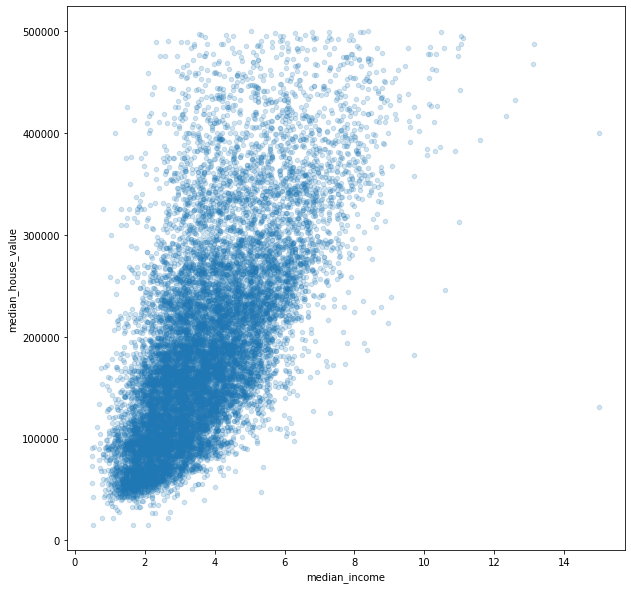

In [168]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

Now we have a more clear scatter plot 

### Attribute Combinations
We'll combine some attributes to get a better understanding, eg: 
- rooms per household: total # of rooms per block group is not useful but rooms per household may be interesting
- bedroom/total room ratio
- population per household

In [211]:
# calculated attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# checkout the correlations again
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.669578
rooms_per_household         0.147818
total_rooms                 0.142161
households                  0.089195
housing_median_age          0.071234
total_bedrooms              0.067480
population                  0.004171
longitude                  -0.042393
latitude                   -0.155561
population_per_household   -0.186293
bedrooms_per_room          -0.268937
Name: median_house_value, dtype: float64

Two findings after combining attributes:
1. rooms_per_household is slightly more correlated (0.147818) with house value than total_rooms (0.142161)
2. bedrooms_per_room is much more correlated (-0.268937) than total_rooms (0.142161) and total_bedrooms (0.067480): houses with lower bedroom/room ratio is more expensive: this sort of make sense, more expensive houses may have more offices, dens, playrooms, etc. 

### Data Cleaning and Transformation
Data need to be cleaned and transformed before trying different ML algorithms.


### Seperate the predictors (independent variables) and labels (target/dependent variables)
We want to create a clean training set first.

In [212]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14475 entries, 17606 to 11159
Data columns (total 13 columns):
longitude                   14475 non-null float64
latitude                    14475 non-null float64
housing_median_age          14475 non-null float64
total_rooms                 14475 non-null float64
total_bedrooms              14333 non-null float64
population                  14475 non-null float64
households                  14475 non-null float64
median_income               14475 non-null float64
median_house_value          14475 non-null float64
ocean_proximity             14475 non-null object
rooms_per_household         14475 non-null float64
bedrooms_per_room           14333 non-null float64
population_per_household    14475 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.5+ MB


In [213]:
housing_labels=housing.median_house_value.copy()
housing.drop("median_house_value", axis=1 ,inplace=True) # drop target labels for training set
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14475 entries, 17606 to 11159
Data columns (total 12 columns):
longitude                   14475 non-null float64
latitude                    14475 non-null float64
housing_median_age          14475 non-null float64
total_rooms                 14475 non-null float64
total_bedrooms              14333 non-null float64
population                  14475 non-null float64
households                  14475 non-null float64
median_income               14475 non-null float64
ocean_proximity             14475 non-null object
rooms_per_household         14475 non-null float64
bedrooms_per_room           14333 non-null float64
population_per_household    14475 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.4+ MB


In [214]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
7364     174300.0
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
Name: median_house_value, Length: 14475, dtype: float64

### Text and Categorial Attributes
Most ML algorithms work with numbers better. Therefore, we often need to convert text attributes into numerical attributes. For ocean_proximity, we'll use 'get_dummies()' function to one hot encode and then concatenate it to the original dataframe


In [215]:
housing_cat=housing['ocean_proximity']

In [216]:
pd.get_dummies(housing_cat)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
7364,1,0,0,0,0
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0


In [217]:
housing = pd.concat([housing , pd.get_dummies(housing_cat)],axis=1)

In [223]:
housing.drop("ocean_proximity",axis=1,inplace=True)

## Missing Values 

Now we'll handle missing values in total_bedrooms and bedrooms_per_room by fillna method

In [224]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14475 entries, 17606 to 11159
Data columns (total 16 columns):
longitude                   14475 non-null float64
latitude                    14475 non-null float64
housing_median_age          14475 non-null float64
total_rooms                 14475 non-null float64
total_bedrooms              14333 non-null float64
population                  14475 non-null float64
households                  14475 non-null float64
median_income               14475 non-null float64
rooms_per_household         14475 non-null float64
bedrooms_per_room           14333 non-null float64
population_per_household    14475 non-null float64
<1H OCEAN                   14475 non-null uint8
INLAND                      14475 non-null uint8
ISLAND                      14475 non-null uint8
NEAR BAY                    14475 non-null uint8
NEAR OCEAN                  14475 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 2.0 MB


In [244]:
housing.fillna(housing.mean(),inplace=True)

In [245]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14475 entries, 17606 to 11159
Data columns (total 16 columns):
longitude                   14475 non-null float64
latitude                    14475 non-null float64
housing_median_age          14475 non-null float64
total_rooms                 14475 non-null float64
total_bedrooms              14475 non-null float64
population                  14475 non-null float64
households                  14475 non-null float64
median_income               14475 non-null float64
rooms_per_household         14475 non-null float64
bedrooms_per_room           14475 non-null float64
population_per_household    14475 non-null float64
<1H OCEAN                   14475 non-null uint8
INLAND                      14475 non-null uint8
ISLAND                      14475 non-null uint8
NEAR BAY                    14475 non-null uint8
NEAR OCEAN                  14475 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 2.0 MB


In [246]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,1,0,0,0,0


### Feature Scaling
Typically, ML algorithms don't perform well when the input numerial attributes have very different scales. For example, in this housing dataset (shown above), you can see median_income ranges from 0.4999 to 15 while total rooms is between 6 and 39320. Note that scaling the target values is typically not required. 

Standardising the data

In [273]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
housing_scaled=housing.copy()

In [274]:
housing_scaled.iloc[:,0:11]=scale.fit_transform(housing.iloc[:,0:11])

In [276]:
housing_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.160756,0.759294,0.782106,-0.518732,-0.472764,-0.670418,-0.449486,-0.668350,-0.396856,0.279926,-0.818224,1,0,0,0,0
18632,-1.180716,0.647692,-1.151425,-0.928905,-1.058808,-1.028099,-1.046372,1.706770,0.310223,-1.047411,-0.237541,1,0,0,0,0
14650,1.179563,-1.342552,0.218160,-0.341559,-0.183359,-0.470329,-0.124632,-0.567459,-0.601423,0.637168,-0.882978,0,0,0,0,1
3230,-0.023031,0.303584,-0.265223,-0.390005,-0.424530,-0.006407,-0.412511,-1.192484,-0.086664,-0.190945,1.113933,0,1,0,0,0
3555,0.485951,-0.663637,-0.909734,1.799275,2.358578,2.648752,2.519100,-0.457176,-0.457960,0.433340,0.084124,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,0.680561,-0.784540,1.184925,-0.861542,-0.807991,-0.573030,-0.858855,-1.188778,-0.469263,0.958351,1.417297,1,0,0,0,0
6563,0.715492,-0.677587,1.426617,-0.655764,-0.750110,-0.791711,-0.790187,0.754601,0.332471,-0.502028,-0.218039,0,1,0,0,0
12053,0.999923,-0.826391,0.943234,-0.690368,-0.610231,-0.367629,-0.663414,-1.074725,-0.391596,0.729934,1.058608,0,1,0,0,0
13908,1.578765,-0.728738,-1.554244,0.997846,0.783735,0.558445,0.675618,-0.305360,0.482743,-0.626413,-0.204872,0,1,0,0,0


### Select and Train a Model
We are going to try Linear Regression, Decision Tree, Random Forest and Support Vector Regression models.

### Linear Regression : 

In [277]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg_scaled=LinearRegression()
lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)  # housing_prepared are independent variables and housing_labels are dependent variables
lin_reg_scaled.fit(housing_scaled,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
# test out the linear regression model
some_data = housing.iloc[:5]  # choose the first five observations
some_labels = housing_labels.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,1,0,0,0,0


In [280]:
print('Actual Prices:', list(some_labels))  # actual prices

Actual Prices: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [281]:
# print predicted prices
print('Predicted Prices:', lin_reg.predict(some_data))

Predicted Prices: [200644.89261746 311919.69082093 202993.13504582  48634.35058256
 183895.04371271]


As you can see, the sample predictions are not very good, i.e., the first one is off by (286600-200644)/286600 ~= 29.9%! Let's calculate the RMSE (root-mean-square error) on the whole training set.

In [283]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

57446.00957488491

In [284]:
housing_labels.describe()

count     14475.000000
mean     193439.695889
std       98278.575830
min       14999.000000
25%      116700.000000
50%      174500.000000
75%      250900.000000
max      500001.000000
Name: median_house_value, dtype: float64

25% and 75% quantile are `$116,700`  and  `$250,900` respectively, which means 50% of the house prices are between those two values. Therefore, $57,446 error is not very good, which is a typical example of **underfitting**.

### Decision Tree :

In [285]:
# Try Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error at all! This is a typical example of **overfitting**. You cannot use the same set of data for both training and validation. Cross-Validation (CV) can help with model validation.

Scikit-Learn CV features expect a utility function (greater is better) than a cost function (lower is better), which is the reason for having `-scores`:

### Linear regression and Decision Trees were also used with scaled values but the results were worse and hence housing_scaled would not be used

#### Generally with models like linear regression , decision trees , random forest : scaling is not important as distances are not measures in these models however for models like SVM they might affect. 

### Cross Validation : 

In [287]:
# 10-fold cross validation
from sklearn.model_selection import cross_val_score

# for decision tree
tree_scores = cross_val_score(tree_reg, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

# for linear regression
lin_scores = cross_val_score(lin_reg, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [288]:
print('Scores:', tree_rmse_scores)

Scores: [59965.47035771 57982.22639178 61671.68367801 60647.78255638
 60019.40292282 62027.6380559  61060.46551743 60356.65576351
 61590.12342403 62568.1455171 ]


In [289]:
print('Mean:', tree_rmse_scores.mean())

Mean: 60788.959418466504


In [290]:
print('Standard Deviation:', tree_rmse_scores.std())

Standard Deviation: 1246.9774840425039


In [291]:
print('Scores:', lin_rmse_scores)

Scores: [69884.36398145 55073.37199215 57599.16607896 61661.43063631
 56815.94725875 58438.32414153 54992.82143219 56293.6857072
 59380.85572811 57225.35944609]


In [292]:
print('Mean:', lin_rmse_scores.mean())

Mean: 58736.53264027437


In [293]:
print('Standard Deviation:', lin_rmse_scores.std())

Standard Deviation: 4171.33993407437


###### Now, Decision Tree Model's performance is actually worse than the Linear Regression Model: mean rmse 60788 vs. 58736 (the numbers differ everytime you run the models)

### Random Forest

In [295]:
# Try Random Forest, which is an Ensemble Learning model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing, housing_labels)

forest_scores = cross_val_score(forest_reg, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Mean:', forest_rmse_scores.mean())

C:\Users\kusht\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean: 45238.623236925676


### SVR

In [ ]:
"""from sklearn.svm import SVR
from sklearn import model_selection
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# for rbf
svr_rbf_scores = cross_val_score(svr_rbf, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_rbf_rmse_scores = np.sqrt(-svr_rbf_scores)
print('Mean: ' , svr_rbf_rmse_scores.mean())
# for lin
svr_lin_scores = cross_val_score(svr_lin, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_lin_rmse_scores = np.sqrt(-svr_lin_scores)
print('Mean: ' , svr_lin_rmse_scores.mean())
#for poly
svr_poly_scores = cross_val_score(svr_poly, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_poly_rmse_scores = np.sqrt(-svr_poly_scores)
print('Mean: ' , svr_poly_rmse_scores.mean())"""

Random Forest is much better that the previous models. 


### Fine Tune the Model

We'll be trying 18 different combinations and find the best model through GridSearch , one can also use RandomizedSearch if sample space is big

In [298]:
# use GridSearch to find best hyperparameter combinations
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},  # try 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 90 rounds of training in total
grid_search.fit(housing , housing_labels)
grid_search.best_params_  # best parameters

{'max_features': 6, 'n_estimators': 30}

In [299]:
grid_search.best_estimator_  # best estimators

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [300]:
# The importance of the features
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.91621557e-02, 7.17560877e-02, 3.95656298e-02, 1.90999559e-02,
       1.87354867e-02, 1.88136525e-02, 1.70226788e-02, 2.85569834e-01,
       5.19732579e-02, 7.96142331e-02, 1.05947034e-01, 1.48680691e-02,
       1.88018940e-01, 4.37740965e-05, 4.03198822e-03, 5.77722183e-03])

In [302]:
attributes=housing.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2855698341128707, 'median_income'),
 (0.18801894001718233, 'INLAND'),
 (0.10594703445499193, 'population_per_household'),
 (0.07961423313197602, 'bedrooms_per_room'),
 (0.07916215567336725, 'longitude'),
 (0.0717560877345468, 'latitude'),
 (0.051973257949349705, 'rooms_per_household'),
 (0.039565629767794694, 'housing_median_age'),
 (0.01909995588440594, 'total_rooms'),
 (0.01881365254298105, 'population'),
 (0.018735486663588433, 'total_bedrooms'),
 (0.01702267880379698, 'households'),
 (0.014868069114303942, '<1H OCEAN'),
 (0.005777221832956233, 'NEAR OCEAN'),
 (0.004031988219410065, 'NEAR BAY'),
 (4.37740964779437e-05, 'ISLAND')]

Based on the feature importance, you can choose to drop some features such as the last four ocean proximity features to simplify the model. In the following example, the performanc on the test set is actually better than the validation set.

### Evaluation via the Test Set
This step is to see how the model performs on unknow data. As long as the result is not way off from the validation result, you should go ahead lauch the model.

In [312]:
final_model = grid_search.best_estimator_  # best model

# see the best rmse on the validation set
best_valiation_score = grid_search.best_score_
best_validation_rmse = np.sqrt(-best_valiation_score)
best_validation_rmse

43485.898072751486

In [386]:
# see the final rmse on the test set
X_test = strat_test_set

''

### Transforming the test data 
Since test set has missing values and certain features which were added afterwards so we'll transform the test data before putting in algorithms. 

1. Generally , This is done in the preprocessing phase but here also its fine
2. Another way was to use pipelines so all the transformations couldve been executed in one line only but again this is also fine

### Removing duplicates of median house value : 

In [ ]:
#finding the number of duplicates of each median_housing_values
dup_index=X_test[X_test.median_house_value.duplicated()].median_house_value.value_counts()

#indexes of all rows having duplicates>20 
#median_housing_values of these rows is updated to NaN so its easy to identify and remove them using dropna function
rep_index=X_test[X_test.median_house_value.duplicated()].median_house_value.apply(lambda x: np.nan if dup_index[x]>=20 else x)

#mapping this to median_house_value 
for i in rep_index.index : 
    if rep_index.isna()[i]: X_test.at[i,'median_house_value']=np.nan

In [354]:
X_test.median_house_value.isna().sum()

246

In [355]:
X_test.dropna(subset=['median_house_value'] , inplace=True)

In [378]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 5241 to 2398
Data columns (total 9 columns):
longitude             3882 non-null float64
latitude              3882 non-null float64
housing_median_age    3882 non-null float64
total_rooms           3882 non-null float64
total_bedrooms        3836 non-null float64
population            3882 non-null float64
households            3882 non-null float64
median_income         3882 non-null float64
ocean_proximity       3882 non-null object
dtypes: float64(8), object(1)
memory usage: 303.3+ KB


In [379]:
y_test

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 3882, dtype: float64

### Missing Values: 

In [380]:
X_test.fillna(X_test.median(),inplace=True)

### Adding Attributes : 

In [381]:
X_test['rooms_per_household'] = X_test['total_rooms']/X_test['households']
X_test['bedrooms_per_room'] = X_test['total_bedrooms']/X_test['total_rooms']
X_test['population_per_household'] =X_test['population']/X_test['households']

### Dummy variables of Categorical feature : 

In [382]:
catvar=X_test.ocean_proximity
X_test = pd.concat([X_test, pd.get_dummies(catvar)],axis=1)
X_test.drop('ocean_proximity',axis=1,inplace=True)
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,0.156972,2.275000,1,0,0,0,0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,6.388633,0.157490,2.563748,1,0,0,0,0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,4.973744,0.212532,2.408676,1,0,0,0,0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,5.546584,0.171333,3.161491,0,1,0,0,0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,5.877483,0.176901,3.533113,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,4.640000,0.234362,2.245581,0,1,0,0,0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,4.808917,0.226049,2.976645,0,0,0,0,1
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,4.492690,0.219330,2.172515,1,0,0,0,0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,6.535885,0.155564,2.870813,0,1,0,0,0


In [383]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 5241 to 2398
Data columns (total 16 columns):
longitude                   3882 non-null float64
latitude                    3882 non-null float64
housing_median_age          3882 non-null float64
total_rooms                 3882 non-null float64
total_bedrooms              3882 non-null float64
population                  3882 non-null float64
households                  3882 non-null float64
median_income               3882 non-null float64
rooms_per_household         3882 non-null float64
bedrooms_per_room           3882 non-null float64
population_per_household    3882 non-null float64
<1H OCEAN                   3882 non-null uint8
INLAND                      3882 non-null uint8
ISLAND                      3882 non-null uint8
NEAR BAY                    3882 non-null uint8
NEAR OCEAN                  3882 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 382.9 KB


In [384]:
y_test

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 3882, dtype: float64

### Evaluation : 

In [385]:
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

44566.43317858367

### Discussion and Conclusion:  

25% and 75% quantile are `$116,700`  and  `$250,900` respectively, which means 50% of the house prices are between those two values. Therefore, `$44,566` error is not bad at all. 
We started off with error of `$57,446` with linear regression and we reduced it by approximately `$13,000` through random forest and hypertuning. 
Thus its a good predictor for california housing prices (1990) 